In [316]:
import requests
import time, os
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [3]:
# retrieve EPL's HTML
url = 'https://www.premierleague.com/players'
#url2 = 'https://www.premierleague.com/players?se=274&cl=-1'
response = requests.get(url)

In [4]:
# check for success
response.status_code

200

In [7]:
driver = webdriver.Chrome('/usr/bin/chromedriver')

driver.get('https://www.premierleague.com/players')

#print(driver.title)

for i in range(5):
    
    driver.execute_script(
        "window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(1)    

In [6]:
# for i in range(5):
    
#     driver.execute_script(
#         "window.scrollTo(0, document.documentElement.scrollHeight);")
#     time.sleep(1)    

In [8]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [9]:
players_info = [player for player in soup.find_all('tr')]

In [10]:
epl = {}

for player in players_info[1:]:
    name = player.find_all('td')
    link = name[0].find('a')
    player, url = link.text, link['href'].strip('/')
    epl[player] = [url] + [i.text for i in name]

epl

{'Tammy Abraham': ['www.premierleague.com/players/13286/Tammy-Abraham/overview',
  'Tammy Abraham',
  'Forward',
  '  England'],
 'Che Adams': ['www.premierleague.com/players/10905/Che-Adams/overview',
  'Che Adams',
  'Forward',
  '  Scotland'],
 'Tosin Adarabioyo': ['www.premierleague.com/players/13549/Tosin-Adarabioyo/overview',
  'Tosin Adarabioyo',
  'Defender',
  '  England'],
 'Dennis Adeniran': ['www.premierleague.com/players/14674/Dennis-Adeniran/overview',
  'Dennis Adeniran',
  'Midfielder',
  '  England'],
 'Adrián': ['www.premierleague.com/players/4852/Adrián/overview',
  'Adrián',
  'Goalkeeper',
  '  Spain'],
 'Adrien Silva': ['www.premierleague.com/players/11357/Adrien-Silva/overview',
  'Adrien Silva',
  'Midfielder',
  '  Portugal'],
 'Oladapo Afolayan': ['www.premierleague.com/players/21797/Oladapo-Afolayan/overview',
  'Oladapo Afolayan',
  'Forward',
  '  England'],
 'Sergio Agüero': ['www.premierleague.com/players/4328/Sergio-Agüero/overview',
  'Sergio Agüero',
 

In [31]:
# df_epl = pd.DataFrame(epl).T
# df_epl.columns = ['link', 'player', 'position', 'country']
# df_epl.drop(columns=['country'], inplace=True)
# df_epl.reset_index()



,index,link,player,position
0,Tammy Abraham,www.premierleague.com/players/13286/Tammy-Abra...,Tammy Abraham,Forward
1,Che Adams,www.premierleague.com/players/10905/Che-Adams/...,Che Adams,Forward
2,Tosin Adarabioyo,www.premierleague.com/players/13549/Tosin-Adar...,Tosin Adarabioyo,Defender
3,Dennis Adeniran,www.premierleague.com/players/14674/Dennis-Ade...,Dennis Adeniran,Midfielder
4,Adrián,www.premierleague.com/players/4852/Adrián/over...,Adrián,Goalkeeper
...,...,...,...,...
851,Hakim Ziyech,www.premierleague.com/players/20750/Hakim-Ziye...,Hakim Ziyech,Midfielder
852,Kenneth Zohore,www.premierleague.com/players/6627/Kenneth-Zoh...,Kenneth Zohore,Forward
853,Kurt Zouma,www.premierleague.com/players/5175/Kurt-Zouma/...,Kurt Zouma,Defender
854,Oliwer Zych,www.premierleague.com/players/107891/Oliwer-Zy...,Oliwer Zych,Goalkeeper


In [39]:
abc = "Son Heung-Min"
abc.split()[1]

'Heung-Min'

In [11]:
#season 2020/2021

driver = webdriver.Chrome('/usr/bin/chromedriver')


    
    
# df = pd.DataFrame()
data = {}
clean_data = {}
# new_index = [epl.keys()]
import time
for name, val in epl.items():
    
    temp = val[0].split("/")
    #print(temp)
    
    temp[-1] = "stats"
    
    url = "/".join(temp)
        
    
    
    name_split = name.lower().split(' ')
    if (len(name_split) == 1):
        first_name = name_split[0]
        
        urlMV = 'https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query={}&x=0&y=0'.format(first_name)
    else:
        first_name = name_split[0]
        last_name = name_split[1]
        
        urlMV = 'https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query={}+{}&x=0&y=0'.format(first_name, last_name)
    
    try:
        driver.get(urlMV)
        soup2 = BeautifulSoup(driver.page_source, 'html.parser') 
        player_mk = soup2.find_all('td', class_='rechts hauptlink')[0].text  
        
    except:
        player_mk = 'null'
        print('player market value not found')
      
    print(urlMV)
        
    driver.get("https://" + url)
    soup2 = BeautifulSoup(driver.page_source, 'html.parser') 
    
    
    player_appearance = soup2.find_all('span', class_='allStatContainer statappearances')[0].text
    player_appearance = player_appearance.replace('\n','').strip()
    print(player_appearance)
    
   
    
    #player appearances
    if ('player_appearance' in data):
        data.get('player_appearance').append(player_appearance)
    else:
        data['player_appearance'] = [player_appearance]
    

    
    #player market value
    if('market_value' in data):
        data.get('market_value').append(player_mk)
    else:
        data['market_value'] = [player_mk]
    
    
             
    #player position
        
    if('player_pos' in data):
        data.get('player_pos').append(val[2])
    else:
        data['player_pos'] = [val[2]]
    
        
    for div in soup2.find_all('div', class_='statsListBlock'):
        for stat in div.find_all('div', class_='normalStat'):
            skill_df = stat.text.strip().split('\n')
            skill_title = skill_df[0].strip()
            skill_number = skill_df[-1].strip()

            if(skill_title in data):
                data.get(skill_title).append(skill_number)
            else:
                data[skill_title] = [skill_number]
                
    
    
# clean data
for key, val in data.items():
    if(len(val) == len(epl)):
        clean_data[key] = val

# make df
df = pd.DataFrame(clean_data, index = epl.keys())
    
            
print(clean_data)
df


https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query=tammy+abraham&x=0&y=0
89
https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query=che+adams&x=0&y=0
63
https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query=tosin+adarabioyo&x=0&y=0
30
https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query=dennis+adeniran&x=0&y=0
0
https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query=adrián&x=0&y=0
139
https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query=adrien+silva&x=0&y=0
14
https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query=oladapo+afolayan&x=0&y=0
0
https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query=sergio+agüero&x=0&y=0
274
https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query=ahmed+el&x=0&y=0
195
https://www.transfermarkt.com/schnellsuche/ergebnis/schnellsuche?query=ahmed+hegazi&x=0&y=0
39
https://www.transfermarkt.com/schnellsuche/ergebn

,player_appearance,market_value,player_pos,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls
Tammy Abraham,89,€40.00m,Forward,26,5,922,10.36,2,0,56
Che Adams,63,€18.00m,Forward,11,6,804,12.76,1,0,44
Tosin Adarabioyo,30,€10.00m,Defender,0,0,"1,660",55.33,1,0,13
Dennis Adeniran,0,€400Th.,Midfielder,0,0,0,0,0,0,0
Adrián,139,€7.00m,Goalkeeper,0,0,"3,481",25.04,10,2,5
...,...,...,...,...,...,...,...,...,...,...
Hakim Ziyech,21,€40.00m,Midfielder,2,3,634,30.19,3,0,19
Kenneth Zohore,19,€2.50m,Forward,1,1,136,7.16,1,0,13
Kurt Zouma,163,€32.00m,Defender,9,4,"7,330",44.97,13,1,102
Oliwer Zych,0,€50Th.,Goalkeeper,0,0,0,0,0,0,0


In [14]:
df = pd.read_csv("raw_data.csv")
df.rename(columns={'Unnamed: 0':'Player'}, inplace=True)
df

,Player,player_appearance,market_value,player_pos,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls
0,Tammy Abraham,89,40.00m,Forward,26,5,922,10.36,2,0,56
1,Che Adams,63,18.00m,Forward,11,6,804,12.76,1,0,44
2,Tosin Adarabioyo,30,10.00m,Defender,0,0,"1,660",55.33,1,0,13
3,Dennis Adeniran,0,400Th.,Midfielder,0,0,0,0.00,0,0,0
4,Adrián,139,7.00m,Goalkeeper,0,0,"3,481",25.04,10,2,5
...,...,...,...,...,...,...,...,...,...,...,...
852,Hakim Ziyech,21,40.00m,Midfielder,2,3,634,30.19,3,0,19
853,Kenneth Zohore,19,2.50m,Forward,1,1,136,7.16,1,0,13
854,Kurt Zouma,163,32.00m,Defender,9,4,"7,330",44.97,13,1,102
855,Oliwer Zych,0,50Th.,Goalkeeper,0,0,0,0.00,0,0,0


In [270]:
#df[df['player_appearance'] == 0]

In [55]:
# remove player_appearance = 0
df = df[df['player_appearance'] != 0]

# remove market_value = '-'

df = df[df['market_value'] != '-']

# remove 2 players that does not have market value
df = df[(df['Player'] != "Daniel N'Lundulu") & (df['Player'] != "Ian Poveda-Ocampo")] 

# save dataframe + manually added in market_value for Son Heung-Min because of first/last name issue
df.to_csv('20_21_clean.csv', index=True)
df

,Player,player_appearance,market_value,player_pos,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls
0,Tammy Abraham,89,40.00m,Forward,26,5,922,10.36,2,0,56
1,Che Adams,63,18.00m,Forward,11,6,804,12.76,1,0,44
2,Tosin Adarabioyo,30,10.00m,Defender,0,0,"1,660",55.33,1,0,13
4,Adrián,139,7.00m,Goalkeeper,0,0,"3,481",25.04,10,2,5
5,Adrien Silva,14,4.00m,Midfielder,0,1,512,36.57,3,0,9
...,...,...,...,...,...,...,...,...,...,...,...
851,Richairo Zivkovic,5,800Th.,Forward,0,0,18,3.60,0,0,1
852,Hakim Ziyech,21,40.00m,Midfielder,2,3,634,30.19,3,0,19
853,Kenneth Zohore,19,2.50m,Forward,1,1,136,7.16,1,0,13
854,Kurt Zouma,163,32.00m,Defender,9,4,"7,330",44.97,13,1,102


In [304]:
# read clean version
df_21 = pd.read_csv("clean_20_21.csv")
df_21

,Player,player_appearance,market_value,player_pos,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls
0,Tammy Abraham,89,40.00m,Forward,26,5,922,10.36,2,0,56
1,Che Adams,63,18.00m,Forward,11,6,804,12.76,1,0,44
2,Tosin Adarabioyo,30,10.00m,Defender,0,0,1660,55.33,1,0,13
3,Adrián,139,7.00m,Goalkeeper,0,0,3481,25.04,10,2,5
4,Adrien Silva,14,4.00m,Midfielder,0,1,512,36.57,3,0,9
...,...,...,...,...,...,...,...,...,...,...,...
581,Richairo Zivkovic,5,800Th.,Forward,0,0,18,3.60,0,0,1
582,Hakim Ziyech,21,40.00m,Midfielder,2,3,634,30.19,3,0,19
583,Kenneth Zohore,19,2.50m,Forward,1,1,136,7.16,1,0,13
584,Kurt Zouma,163,32.00m,Defender,9,4,7330,44.97,13,1,102


In [305]:
# convert market_value to corresponding numbers

df_21['market_value']= df_21['market_value'].str.replace('Th.', 't')
df_21['market_value']

convert_value = {'m': 1000000, 't': 1000}
df_21.loc[:, 'market_value'] = pd.to_numeric(df_21['market_value'].str[:-1]) * \
                                            df_21['market_value'].str[-1].replace(convert_value)

df_21

<ipython-input-305-1d686dfbc70b>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_21['market_value']= df_21['market_value'].str.replace('Th.', 't')


,Player,player_appearance,market_value,player_pos,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls
0,Tammy Abraham,89,40000000.0,Forward,26,5,922,10.36,2,0,56
1,Che Adams,63,18000000.0,Forward,11,6,804,12.76,1,0,44
2,Tosin Adarabioyo,30,10000000.0,Defender,0,0,1660,55.33,1,0,13
3,Adrián,139,7000000.0,Goalkeeper,0,0,3481,25.04,10,2,5
4,Adrien Silva,14,4000000.0,Midfielder,0,1,512,36.57,3,0,9
...,...,...,...,...,...,...,...,...,...,...,...
581,Richairo Zivkovic,5,800000.0,Forward,0,0,18,3.60,0,0,1
582,Hakim Ziyech,21,40000000.0,Midfielder,2,3,634,30.19,3,0,19
583,Kenneth Zohore,19,2500000.0,Forward,1,1,136,7.16,1,0,13
584,Kurt Zouma,163,32000000.0,Defender,9,4,7330,44.97,13,1,102


In [306]:
# dummy variable for position
position_dummy = pd.get_dummies(df_21['player_pos'], drop_first=True)
position_dummy

,Forward,Goalkeeper,Midfielder
0,1,0,0
1,1,0,0
2,0,0,0
3,0,1,0
4,0,0,1
...,...,...,...
581,1,0,0
582,0,0,1
583,1,0,0
584,0,0,0


## Final clean version of 2020-21 players

In [307]:
# merge the dummy variable 
df_21 = pd.concat([df_21, position_dummy], axis=1)
df_21

,Player,player_appearance,market_value,player_pos,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls,Forward,Goalkeeper,Midfielder
0,Tammy Abraham,89,40000000.0,Forward,26,5,922,10.36,2,0,56,1,0,0
1,Che Adams,63,18000000.0,Forward,11,6,804,12.76,1,0,44,1,0,0
2,Tosin Adarabioyo,30,10000000.0,Defender,0,0,1660,55.33,1,0,13,0,0,0
3,Adrián,139,7000000.0,Goalkeeper,0,0,3481,25.04,10,2,5,0,1,0
4,Adrien Silva,14,4000000.0,Midfielder,0,1,512,36.57,3,0,9,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,Richairo Zivkovic,5,800000.0,Forward,0,0,18,3.60,0,0,1,1,0,0
582,Hakim Ziyech,21,40000000.0,Midfielder,2,3,634,30.19,3,0,19,0,0,1
583,Kenneth Zohore,19,2500000.0,Forward,1,1,136,7.16,1,0,13,1,0,0
584,Kurt Zouma,163,32000000.0,Defender,9,4,7330,44.97,13,1,102,0,0,0


## Regression Modeling

In [309]:
features, target = ['player_appearance','Goals', 'Assists', 'Passes', 'Passes per match',
                    'Yellow cards', 'Red cards', 'Fouls', 'Forward', 'Goalkeeper', 'Midfielder'], 'market_value'
X, y = df_21[features], df_21[target]

lm = LinearRegression() 
lm.fit(X, y)

LinearRegression()

In [310]:
lm.score(X,y) # R-squared value

0.3173750828750701

In [311]:
print(lm.intercept_)
print('--------------------------------------------------------')
print(lm.coef_)


-5330848.520128923
--------------------------------------------------------
[-3.53889716e+04  3.83449672e+05  1.96646256e+05  7.85744773e+02
  5.45765434e+05 -1.80130485e+05 -1.45694421e+06 -3.09839244e+04
  1.28668283e+07  1.46782329e+06  5.96242430e+06]


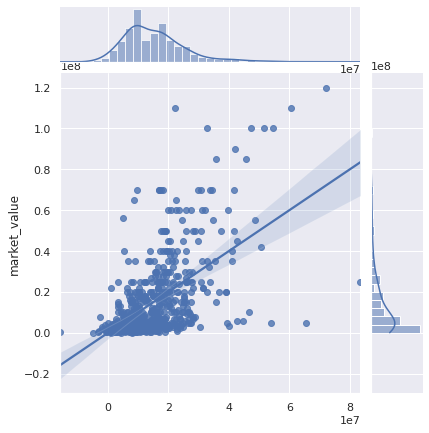

In [312]:
preds = lm.predict(X) # generate predictdions (on training data) using fit model

sns.jointplot(x=preds, y=y, kind='reg')

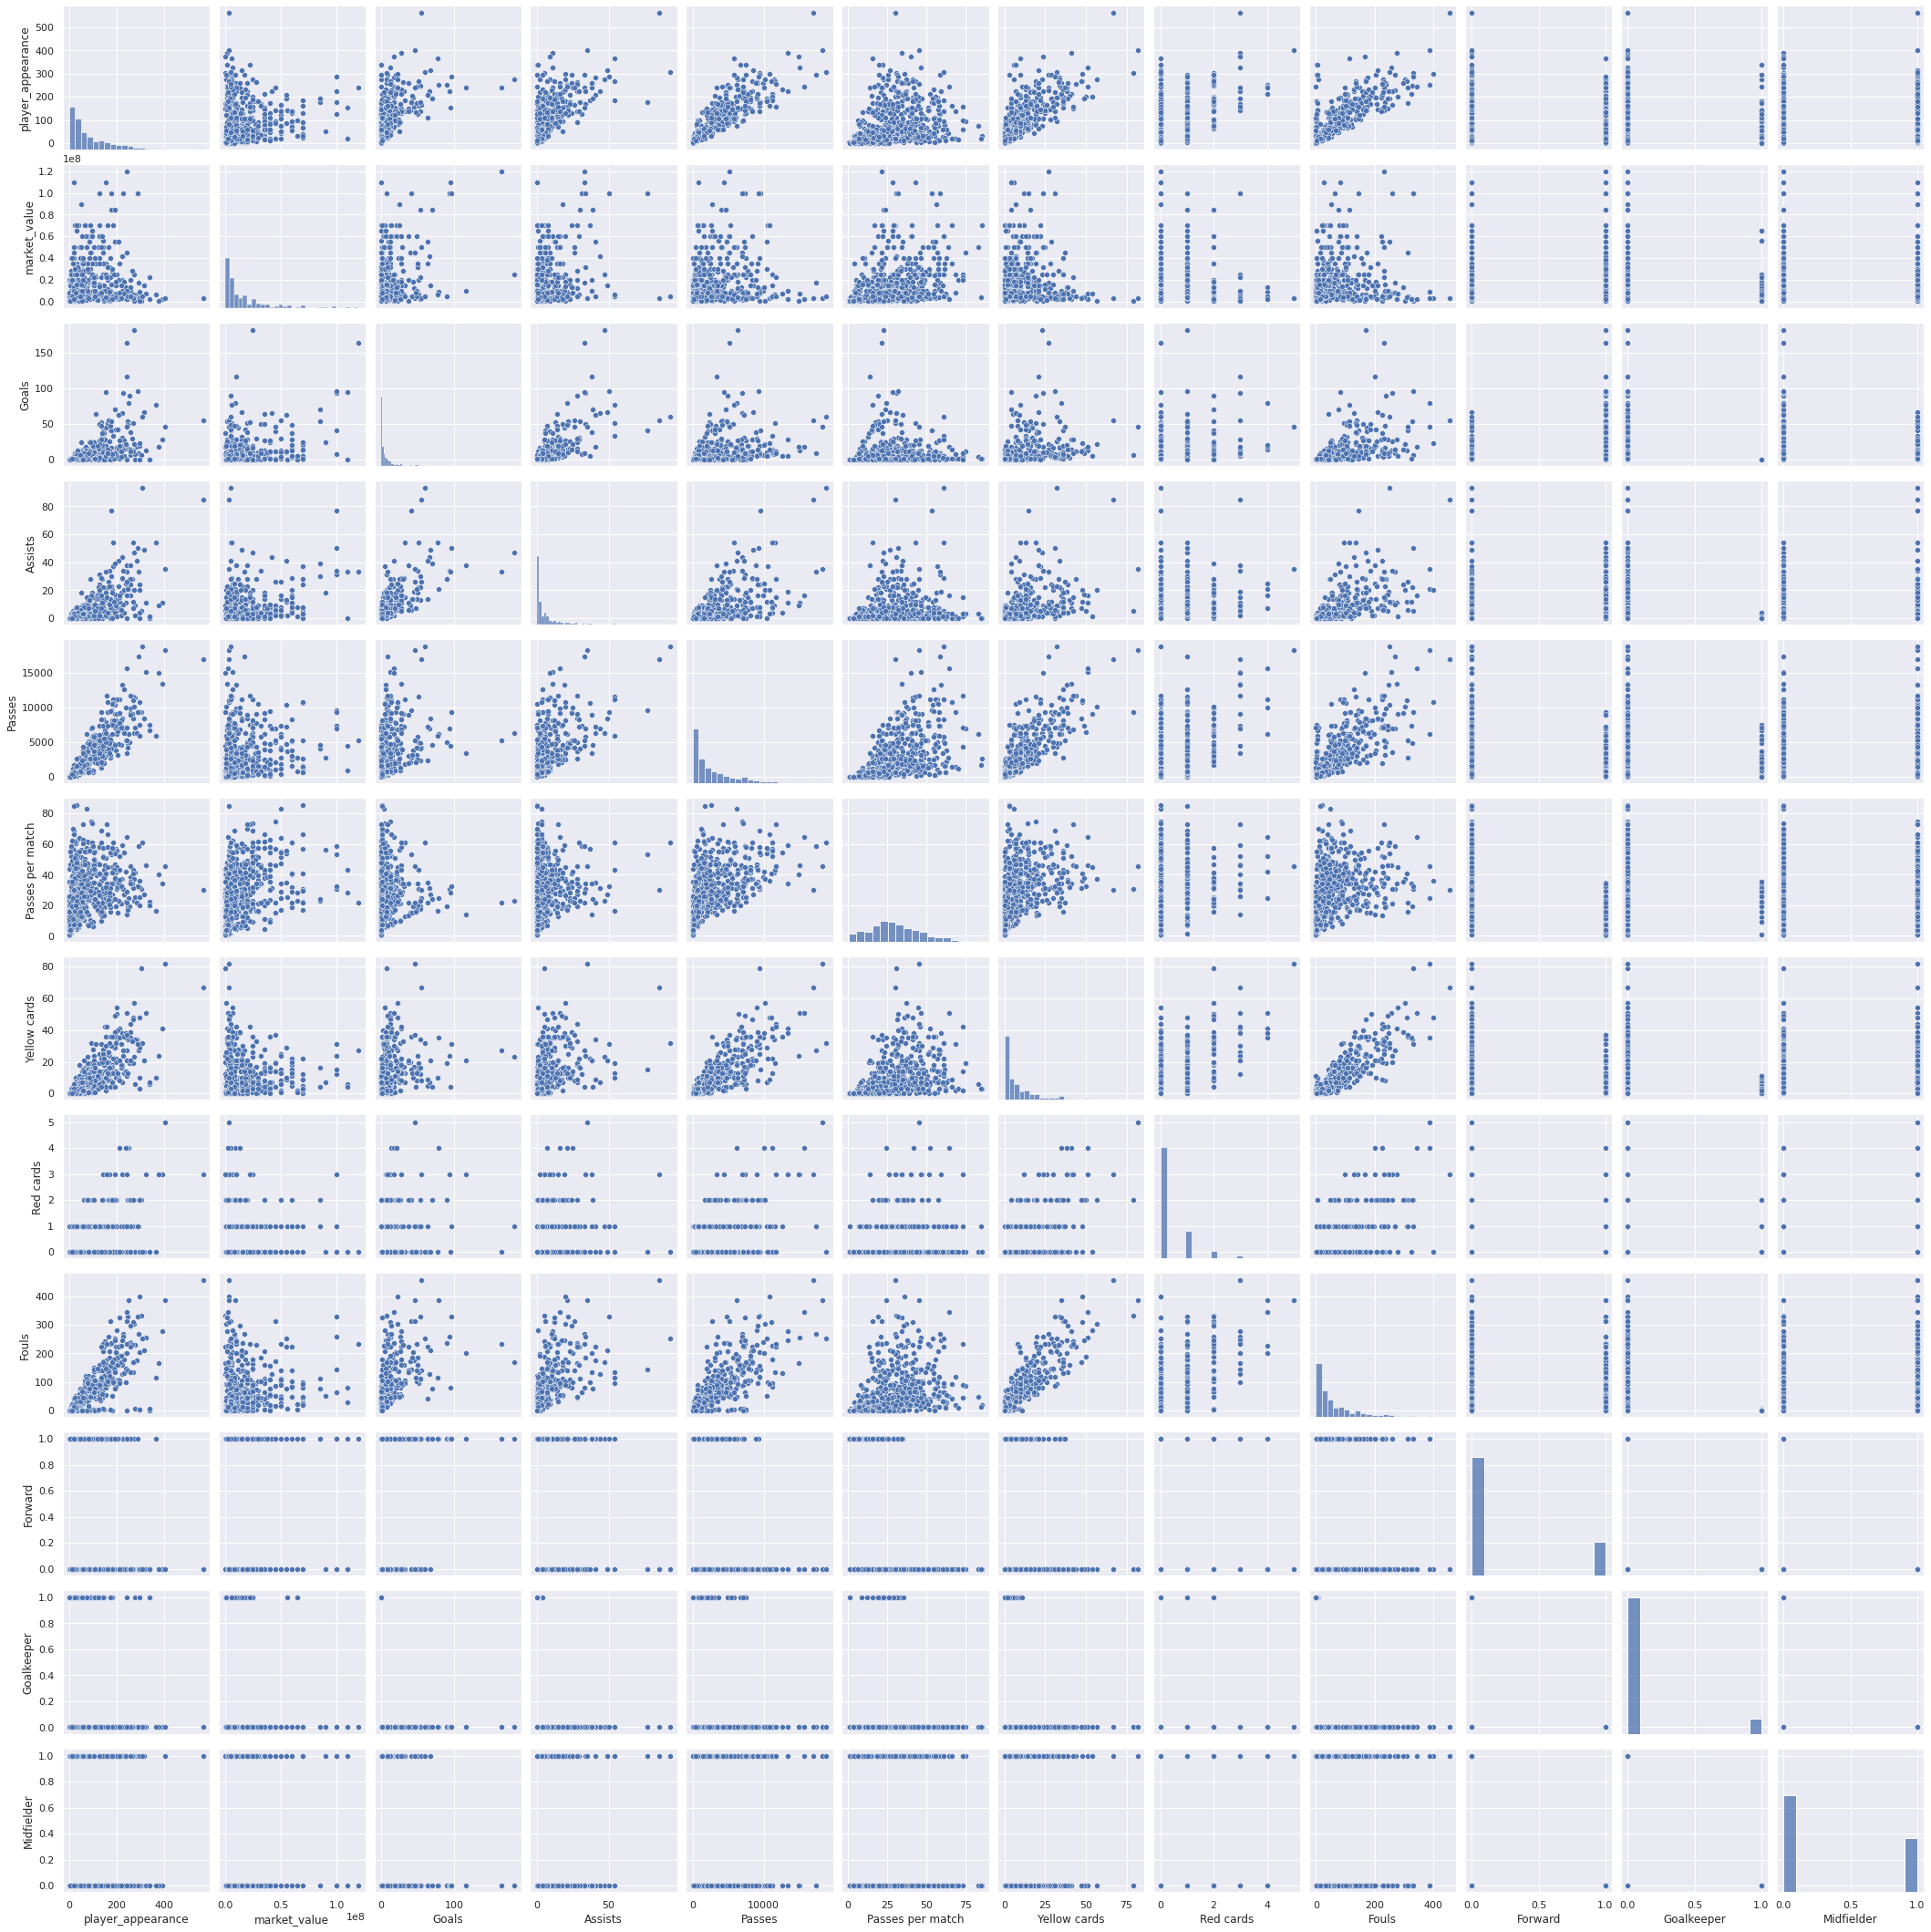

In [313]:
# pair plot

sns.pairplot(df_21)

In [347]:
# make a copy of original clean data
df_ = df_21.copy()
df_

,Player,player_appearance,market_value,player_pos,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls,Forward,Goalkeeper,Midfielder
0,Tammy Abraham,89,40000000.0,Forward,26,5,922,10.36,2,0,56,1,0,0
1,Che Adams,63,18000000.0,Forward,11,6,804,12.76,1,0,44,1,0,0
2,Tosin Adarabioyo,30,10000000.0,Defender,0,0,1660,55.33,1,0,13,0,0,0
3,Adrián,139,7000000.0,Goalkeeper,0,0,3481,25.04,10,2,5,0,1,0
4,Adrien Silva,14,4000000.0,Midfielder,0,1,512,36.57,3,0,9,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,Richairo Zivkovic,5,800000.0,Forward,0,0,18,3.60,0,0,1,1,0,0
582,Hakim Ziyech,21,40000000.0,Midfielder,2,3,634,30.19,3,0,19,0,0,1
583,Kenneth Zohore,19,2500000.0,Forward,1,1,136,7.16,1,0,13,1,0,0
584,Kurt Zouma,163,32000000.0,Defender,9,4,7330,44.97,13,1,102,0,0,0


In [353]:
# cols = df_.columns.tolist()
# cols

In [349]:
cols = cols[2:] + cols[0:2]

df_ = df_[cols]
df_ = df_.drop(columns=["Player", "player_pos"])
df_

,market_value,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls,Forward,Goalkeeper,Midfielder,player_appearance
0,40000000.0,26,5,922,10.36,2,0,56,1,0,0,89
1,18000000.0,11,6,804,12.76,1,0,44,1,0,0,63
2,10000000.0,0,0,1660,55.33,1,0,13,0,0,0,30
3,7000000.0,0,0,3481,25.04,10,2,5,0,1,0,139
4,4000000.0,0,1,512,36.57,3,0,9,0,0,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...
581,800000.0,0,0,18,3.60,0,0,1,1,0,0,5
582,40000000.0,2,3,634,30.19,3,0,19,0,0,1,21
583,2500000.0,1,1,136,7.16,1,0,13,1,0,0,19
584,32000000.0,9,4,7330,44.97,13,1,102,0,0,0,163


In [350]:
corr_matrix = df_.corr()
corr_matrix

,market_value,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls,Forward,Goalkeeper,Midfielder,player_appearance
market_value,1.000000,0.366756,0.324198,0.178953,0.286131,0.060379,0.017028,0.143340,0.138159,-0.132917,0.029917,0.133868
Goals,0.366756,1.000000,0.724467,0.381668,-0.015004,0.366096,0.291808,0.562315,0.382457,-0.158734,-0.040829,0.565221
Assists,0.324198,0.724467,1.000000,0.618987,0.153686,0.492540,0.289326,0.633857,0.143826,-0.180895,0.129521,0.682771
Passes,0.178953,0.381668,0.618987,1.000000,0.523931,0.822842,0.520085,0.782735,-0.189770,-0.090774,0.067011,0.883562
Passes per match,0.286131,-0.015004,0.153686,0.523931,1.000000,0.367833,0.198825,0.279324,-0.469591,-0.100244,0.023812,0.247061
Yellow cards,0.060379,0.366096,0.492540,0.822842,0.367833,1.000000,0.567569,0.887106,-0.130734,-0.202317,0.093341,0.787731
Red cards,0.017028,0.291808,0.289326,0.520085,0.198825,0.567569,1.000000,0.571626,-0.018842,-0.091904,-0.008732,0.517762
Fouls,0.143340,0.562315,0.633857,0.782735,0.279324,0.887106,0.571626,1.000000,0.046499,-0.270619,0.099254,0.816997
Forward,0.138159,0.382457,0.143826,-0.189770,-0.469591,-0.130734,-0.018842,0.046499,1.000000,-0.177770,-0.397057,-0.005737
Goalkeeper,-0.132917,-0.158734,-0.180895,-0.090774,-0.100244,-0.202317,-0.091904,-0.270619,-0.177770,1.000000,-0.250056,-0.026156


<AxesSubplot:>

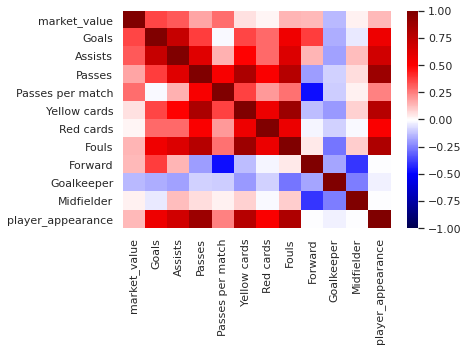

In [351]:
# heatmap

sns.heatmap(df_.corr(), cmap='seismic', annot=False, vmin=-1, vmax=1)

Text(0.5, 1.0, 'Correlation Heatmap')

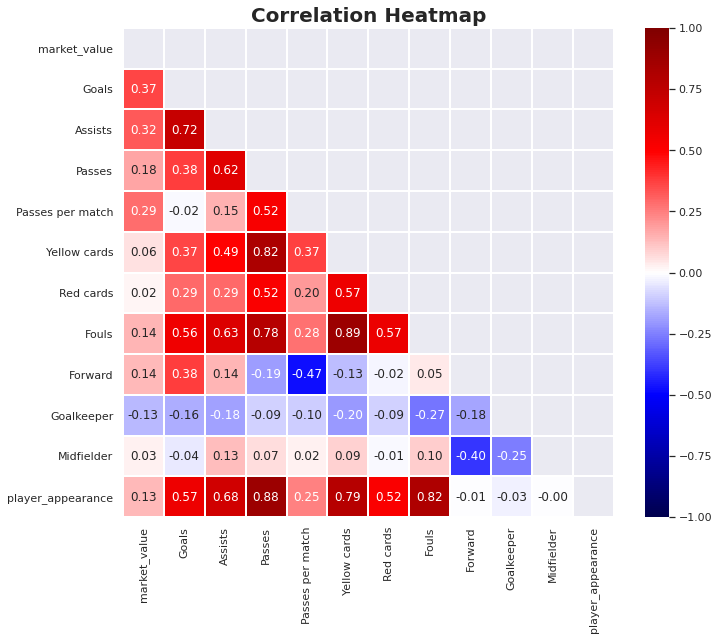

In [352]:
# correlation heatmap

fig = plt.figure(figsize=[11,9])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)


In [29]:
df['market_value'] = df['market_value'].str.replace('€', '')
df['market_value']

Tammy Abraham       40.00m
Che Adams           18.00m
Tosin Adarabioyo    10.00m
Dennis Adeniran     400Th.
Adrián               7.00m
                     ...  
Hakim Ziyech        40.00m
Kenneth Zohore       2.50m
Kurt Zouma          32.00m
Oliwer Zych          50Th.
Martin Ødegaard     40.00m
Name: market_value, Length: 857, dtype: object

In [36]:
# df[df['market_value'] == 'null']
# df[df['market_value'] == '-']
# df[df['player_appearance'] == '0']

,player_appearance,market_value,player_pos,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards,Fouls
Ajibola Alese,0,null,Defender,0,0,0,0,0,0,0
Lamar Bogarde,0,null,Midfielder,0,0,0,0,0,0,0
Josh Felix-Eppiah,0,null,Forward,0,0,0,0,0,0,0
Wanya Madavidua,0,null,Midfielder,0,0,0,0,0,0,0
Daniel N'Lundulu,13,null,Forward,0,0,29,2.23,0,0,6
Ian Poveda-Ocampo,13,null,Forward,0,0,108,8.31,0,0,5
Son Heung-Min,194,null,Forward,70,39,"4,628",23.86,4,2,77
